DAY 20 - Mar 16, 2017

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load libs
import psycopg2
import pandas.io.sql as pdsql

# Specify our database
dbname="hr"
name_of_table = "survey"

# Connect to database
conn = psycopg2.connect(dbname=dbname)

# Make database query
df = pdsql.read_sql_query("SELECT * FROM %s;" % name_of_table, conn)
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left_workplace,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,False,True,False,sales,low
1,2,0.80,0.86,5,262,6,False,True,False,sales,medium
2,3,0.11,0.88,7,272,4,False,True,False,sales,medium
3,4,0.72,0.87,5,223,5,False,True,False,sales,low
4,5,0.37,0.52,2,159,3,False,True,False,sales,low


Yesterday we explored the [Kaggle hr data](https://www.kaggle.com/ludobenistant/hr-analytics) to answer a few dashboard type questions. 

Moving beyond the scope of a data analyst and into the scope of a data scientist, I asked the following:

Given the list of available features, are we able to predict a person's salary? And are we able to identify features that are more informative with regards to the person's salary?

In [3]:
features = df.columns[1:-2]
list(features)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'left_workplace',
 'promotion_last_5years']

In [4]:
X = df[features]
Y = df["salary"]

In [5]:
# Split the data set: train on 80% and test on 20%
n = len(X)
n_80 = int(n * .8)

X_train = X[:n_80]
Y_train = Y[:n_80]
X_test = X[n_80:]
Y_test = Y[n_80:]

In [6]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [7]:
sum(rfc.predict(X_test) == Y_test)/len(X_test)

0.96399999999999997

In [8]:
feature_importance = pd.DataFrame({"Importance":rfc.feature_importances_}, index=features)
feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
feature_importance

,Importance
average_montly_hours,0.343234
last_evaluation,0.268360
satisfaction_level,0.246914
time_spend_company,0.068720
number_project,0.051190
work_accident,0.011550
left_workplace,0.005942
promotion_last_5years,0.004091


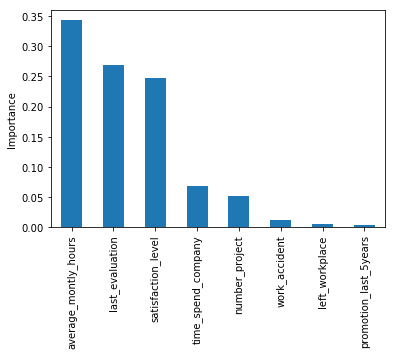

In [9]:
feature_importance.plot(kind="bar", legend=False)
plt.ylabel("Importance")

Most important features in predicting salary is (1) average_montly_hours, (2) last_evaluation, and (3) satisfaction_level

Considering only these features, we are able to make prediction wit 94% accuracy and without those features 57% accuracy.

In [10]:
features = ["average_montly_hours", "last_evaluation", "satisfaction_level"]

X = df[features]
Y = df["salary"]

X_train = X[:n_80]
Y_train = Y[:n_80]
X_test = X[n_80:]
Y_test = Y[n_80:]

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

sum(rfc.predict(X_test) == Y_test)/len(X_test)

0.94966666666666666

In [11]:
features = ["time_spend_company", "number_project", "work_accident", "left_workplace", "promotion_last_5years"]

X = df[features]
Y = df["salary"]

X_train = X[:n_80]
Y_train = Y[:n_80]
X_test = X[n_80:]
Y_test = Y[n_80:]

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

sum(rfc.predict(X_test) == Y_test)/len(X_test)

0.57233333333333336